In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Read in csv saved locally
df = pd.read_csv("indiana_counties_corn_yield_30y.csv")

In [31]:
import pandas as pd

# 1. Load your yield CSV
df = pd.read_csv('indiana_counties_corn_yield_30y.csv')

# 2. Standardize column names (to avoid Case Sensitivity errors)
df.columns = df.columns.str.lower().str.strip()

# 3. Get unique names from the 'county' column
# This assumes your column is named 'county'
counties = df['county'].unique()

# 4. Print them out (sorted alphabetically for easier reading)
counties.sort()
print(f"Found {len(counties)} unique counties:")
print(counties)

Found 93 unique counties:
['ADAMS' 'ALLEN' 'BARTHOLOMEW' 'BENTON' 'BLACKFORD' 'BOONE' 'BROWN'
 'CARROLL' 'CASS' 'CLARK' 'CLAY' 'CLINTON' 'CRAWFORD' 'DAVIESS' 'DE KALB'
 'DEARBORN' 'DECATUR' 'DELAWARE' 'DUBOIS' 'ELKHART' 'FAYETTE' 'FLOYD'
 'FOUNTAIN' 'FRANKLIN' 'FULTON' 'GIBSON' 'GRANT' 'GREENE' 'HAMILTON'
 'HANCOCK' 'HARRISON' 'HENDRICKS' 'HENRY' 'HOWARD' 'HUNTINGTON' 'JACKSON'
 'JASPER' 'JAY' 'JEFFERSON' 'JENNINGS' 'JOHNSON' 'KNOX' 'KOSCIUSKO'
 'LA PORTE' 'LAGRANGE' 'LAKE' 'LAWRENCE' 'MADISON' 'MARION' 'MARSHALL'
 'MARTIN' 'MIAMI' 'MONROE' 'MONTGOMERY' 'MORGAN' 'NEWTON' 'NOBLE' 'OHIO'
 'ORANGE' 'OTHER (COMBINED) COUNTIES' 'OWEN' 'PARKE' 'PERRY' 'PIKE'
 'PORTER' 'POSEY' 'PULASKI' 'PUTNAM' 'RANDOLPH' 'RIPLEY' 'RUSH' 'SCOTT'
 'SHELBY' 'SPENCER' 'ST. JOSEPH' 'STARKE' 'STEUBEN' 'SULLIVAN'
 'SWITZERLAND' 'TIPPECANOE' 'TIPTON' 'UNION' 'VANDERBURGH' 'VERMILLION'
 'VIGO' 'WABASH' 'WARREN' 'WARRICK' 'WASHINGTON' 'WAYNE' 'WELLS' 'WHITE'
 'WHITLEY']


In [32]:
import pandas as pd
from functools import reduce

# 1. Define your files and their variable names
weather_files = {
    'precip': 'precip.txt',
    'tmax': 'tmax.txt',
    'tmin': 'tmin.txt',
    'tave': 'tave.txt'
}

def process_noaa_fwf(filename, var_name):
    # Defining exact widths to ensure all rows are captured
    widths = [11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
    month_names = [f"{var_name}_{m}" for m in range(1, 13)]
    cols = ['id'] + month_names
    
    # Read as string to keep leading zeros (important for FIPS 01, etc)
    df = pd.read_fwf(filename, widths=widths, names=cols, dtype={'id': str})
    
    # Filter for Indiana (Starts with 18)
    in_df = df[df['id'].str.startswith('18')].copy()
    
    # Extract Metadata
    in_df['year'] = in_df['id'].str[7:11].astype(int)
    in_df['county_code'] = in_df['id'].str[2:5].astype(int)
    
    # --- THE FIX: Drop the 'id' column so it doesn't cause MergeErrors ---
    in_df = in_df.drop(columns=['id'])
    
    # Clean missing values
    in_df = in_df.replace(-9.99, 0).replace(-99.99, 0)
    
    return in_df

# Now run the rest of your loop and merge code:
processed_dfs = []
for var, path in weather_files.items():
    print(f"Processing {var}...")
    processed_dfs.append(process_noaa_fwf(path, var))

# This merge will now work smoothly
weather_final = reduce(lambda left, right: pd.merge(left, right, on=['year', 'county_code']), processed_dfs)

# 2. Process all four files
processed_dfs = []
for var, path in weather_files.items():
    print(f"Processing {var}...")
    processed_dfs.append(process_noaa_fwf(path, var))

# 3. Merge them all into one big table based on Year and County Code
weather_final = reduce(lambda left, right: pd.merge(left, right, on=['year', 'county_code']), processed_dfs)

# 4. Filter for your target timeframe (e.g., 1990 onwards)
weather_final = weather_final[weather_final['year'] >= 1990]

print(f"\nSuccess! Merged weather data for {weather_final['county_code'].nunique()} Indiana counties.")
print(f"Columns created: {list(weather_final.columns)}")

print(f"Final dataset rows: {len(weather_final)}")
print(f"Years available: {weather_final['year'].unique()}")
print(f"Counties available: {weather_final['county_code'].nunique()}")

Processing precip...
Processing tmax...
Processing tmin...
Processing tave...
Processing precip...
Processing tmax...
Processing tmin...
Processing tave...

Success! Merged weather data for 25 Indiana counties.
Columns created: ['precip_1', 'precip_2', 'precip_3', 'precip_4', 'precip_5', 'precip_6', 'precip_7', 'precip_8', 'precip_9', 'precip_10', 'precip_11', 'precip_12', 'year', 'county_code', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmax_5', 'tmax_6', 'tmax_7', 'tmax_8', 'tmax_9', 'tmax_10', 'tmax_11', 'tmax_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'tmin_5', 'tmin_6', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'tmin_11', 'tmin_12', 'tave_1', 'tave_2', 'tave_3', 'tave_4', 'tave_5', 'tave_6', 'tave_7', 'tave_8', 'tave_9', 'tave_10', 'tave_11', 'tave_12']
Final dataset rows: 900
Years available: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025]
Countie

In [33]:
# Mapping for the first 50ish codes (covers most of the 25 you likely have)
in_county_map = {
    1: 'ADAMS', 3: 'ALLEN', 5: 'BARTHOLOMEW', 7: 'BENTON', 9: 'BLACKFORD',
    11: 'BOONE', 13: 'BROWN', 15: 'CARROLL', 17: 'CASS', 19: 'CLARK',
    21: 'CLAY', 23: 'CLINTON', 25: 'CRAWFORD', 27: 'DAVIESS', 29: 'DEARBORN',
    31: 'DECATUR', 33: 'DE KALB', 35: 'DELAWARE', 37: 'DUBOIS', 39: 'ELKHART',
    41: 'FAYETTE', 43: 'FLOYD', 45: 'FOUNTAIN', 47: 'FRANKLIN', 49: 'FULTON',
    51: 'GIBSON', 53: 'GRANT', 55: 'GREENE', 57: 'HAMILTON', 59: 'HANCOCK'
}

# 1. Map the names
weather_final['county'] = weather_final['county_code'].map(in_county_map)

# 2. Load and clean your Yield CSV
# (Adjust 'yield_data.csv' to your actual yield filename)
yield_df = pd.read_csv('indiana_counties_corn_yield_30y.csv')
yield_df.columns = yield_df.columns.str.lower().str.strip()
yield_df['county'] = yield_df['county'].str.upper().str.strip()

# 3. Final Merge
# This will result in 900 rows (or fewer if some years are missing in yield)
merged_df = pd.merge(yield_df, weather_final, on=['year', 'county'])

print(f"Final Merged Rows: {len(merged_df)}")

Final Merged Rows: 558


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px

# 1. Select only the weather columns (month_1 to month_12 for all 4 types)
# This excludes 'year', 'county', and 'yield'
weather_cols = [col for col in merged_df.columns if any(var in col for var in ['precip', 'tmax', 'tmin', 'tave'])]
X = merged_df[weather_cols]

# 2. Standardize the features (Mean=0, Variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
# Let's start by reducing 48 variables down to 2 "Climate Components"
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=40, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_scaled)


# Make visualization here
pca_data = pd.DataFrame(X_pca)

# 4. Check how much information we kept
explained_variance = sum(pca.explained_variance_ratio_) * 100
print(f"The top 3 PCA components capture {explained_variance:.2f}% of the total weather variance.")
pca_data

The top 3 PCA components capture 50.66% of the total weather variance.


,0,1,2
0,1.831313,0.686779,-0.398515
1,3.462469,1.299097,-1.170112
2,-8.351081,1.613307,0.519920
3,2.475611,1.582844,-0.297941
4,3.813842,0.905190,-0.797768
...,...,...,...
553,-0.889827,2.160447,1.995822
554,-4.747072,2.604207,0.507550
555,-0.835095,2.377318,1.417050
556,-5.538690,2.626653,0.561698


In [35]:
import pandas as pd
import plotly.express as px

# 1. Create a temporary DataFrame for plotting
# We ensure the index matches so the yield values align with the t-SNE points
plot_df = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'yield': merged_df['value'], # Using 'value' as your yield column
    'county': merged_df['county'],
    'year': merged_df['year']
})

# 2. Generate the plot
fig = px.scatter(
    plot_df, 
    x='x', 
    y='y', 
    color='yield',
    color_continuous_scale='RdYlGn', # Red (Low Yield) to Yellow to Green (High Yield)
    hover_data=['county', 'year', 'yield'],
    title="t-SNE Weather Clusters Colored by Corn Yield"
)

# 3. Enhance the visual clarity
fig.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='white')))
fig.update_layout(
    coloraxis_colorbar=dict(title="Bushels/Acre"),
    plot_bgcolor='white'
)

fig.show()

In [36]:
# Create a DataFrame of the PCA loadings
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(3)], 
    index=weather_cols
)

# Look at the top contributors for PC1 and PC2
print("Top contributors for PC1 (The strongest climate signal):")
print(loadings['PC1'].sort_values(ascending=False).head(5))

print("\nTop contributors for PC2:")
print(loadings['PC2'].sort_values(ascending=False).head(5))

Top contributors for PC1 (The strongest climate signal):
tmin_7    0.212440
tave_7    0.211394
tave_8    0.205795
tmin_8    0.203321
tave_6    0.199331
Name: PC1, dtype: float64

Top contributors for PC2:
tave_2    0.263493
tmin_2    0.260160
tmax_2    0.253560
tmin_1    0.223635
tave_1    0.223627
Name: PC2, dtype: float64


In [37]:
# Create a function to calculate Monthly GDD Proxy
# See this: https://ndawn.ndsu.nodak.edu/help-corn-growing-degree-days.html

def calculate_monthly_gdd(tmax, tmin):
    # Apply the 86°F ceiling and 50°F floor rule to the monthly averages
    adj_tmax = tmax.clip(lower=50, upper=86)
    adj_tmin = tmin.clip(lower=50, upper=86)
    
    # Calculate GDD and multiply by ~30 days to get monthly accumulation
    monthly_gdd = ((adj_tmax + adj_tmin) / 2 - 50) * 30
    return monthly_gdd

# Apply this to the growing season months (May - August)
for m in [5, 6, 7, 8]:
    merged_df[f'gdd_{m}'] = calculate_monthly_gdd(merged_df[f'tmax_{m}'], merged_df[f'tmin_{m}'])

# Create a 'Total Season GDD' feature
merged_df['total_gdd'] = merged_df[['gdd_5', 'gdd_6', 'gdd_7', 'gdd_8']].sum(axis=1)

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# 1. Calculating Features
# A tech feature to account for advances in technology over the years
merged_df['tech_trend'] = merged_df['year'] - 1990

# July Assymetric Precipiation Feature
# https://ers.usda.gov/data-products/charts-of-note/chart-detail?chartId=76847
# According to USDA, drops below ~3.85" hurt more than gains above it help
merged_df['july_precip_deficit'] = (3.85 - merged_df['precip_7']).clip(lower=0)

# Heat Stress Penalty (Days > 95°F)
# Since we have tmax, we emphasize values above 95
merged_df['extreme_heat_july'] = (merged_df['tmax_7'] - 95).clip(lower=0)

# 2. Ensure County Baseline exists (to solve Spatial Bias problem)
merged_df['county_baseline'] = merged_df.groupby('county')['value'].transform('mean')

# Calculating corn growing degree days (see https://ndawn.ndsu.nodak.edu/help-corn-growing-degree-days.html)
merged_df['total_gdd'] = sum(calculate_monthly_gdd(merged_df[f'tmax_{m}'], merged_df[f'tmin_{m}']) for m in [5,6,7,8])

# Put special emphasis on July as it is the most important for growth
merged_df['gdd_7'] = calculate_monthly_gdd(merged_df['tmax_7'], merged_df['tmin_7'])

# 4. Stack and Train
X_v3_plus = np.column_stack((
    X_pca, 
    merged_df['tech_trend'].values,
    merged_df['july_precip_deficit'].values,
    merged_df['extreme_heat_july'].values,
    merged_df['total_gdd'].values,
    merged_df['gdd_7'].values,
    merged_df['county_baseline'].values
))

y = merged_df['value']
X_train, X_test, y_train, y_test = train_test_split(X_v3_plus, y, test_size=0.2, random_state=42)

model_v3_plus = GradientBoostingRegressor(n_estimators=250, learning_rate=0.01, max_depth=3, random_state=42)
model_v3_plus.fit(X_train, y_train)

print(f"Model V3+ With County Feature R-squared: {model_v3_plus.score(X_test, y_test):.4f}")

Model V3+ With County Feature R-squared: 0.7391


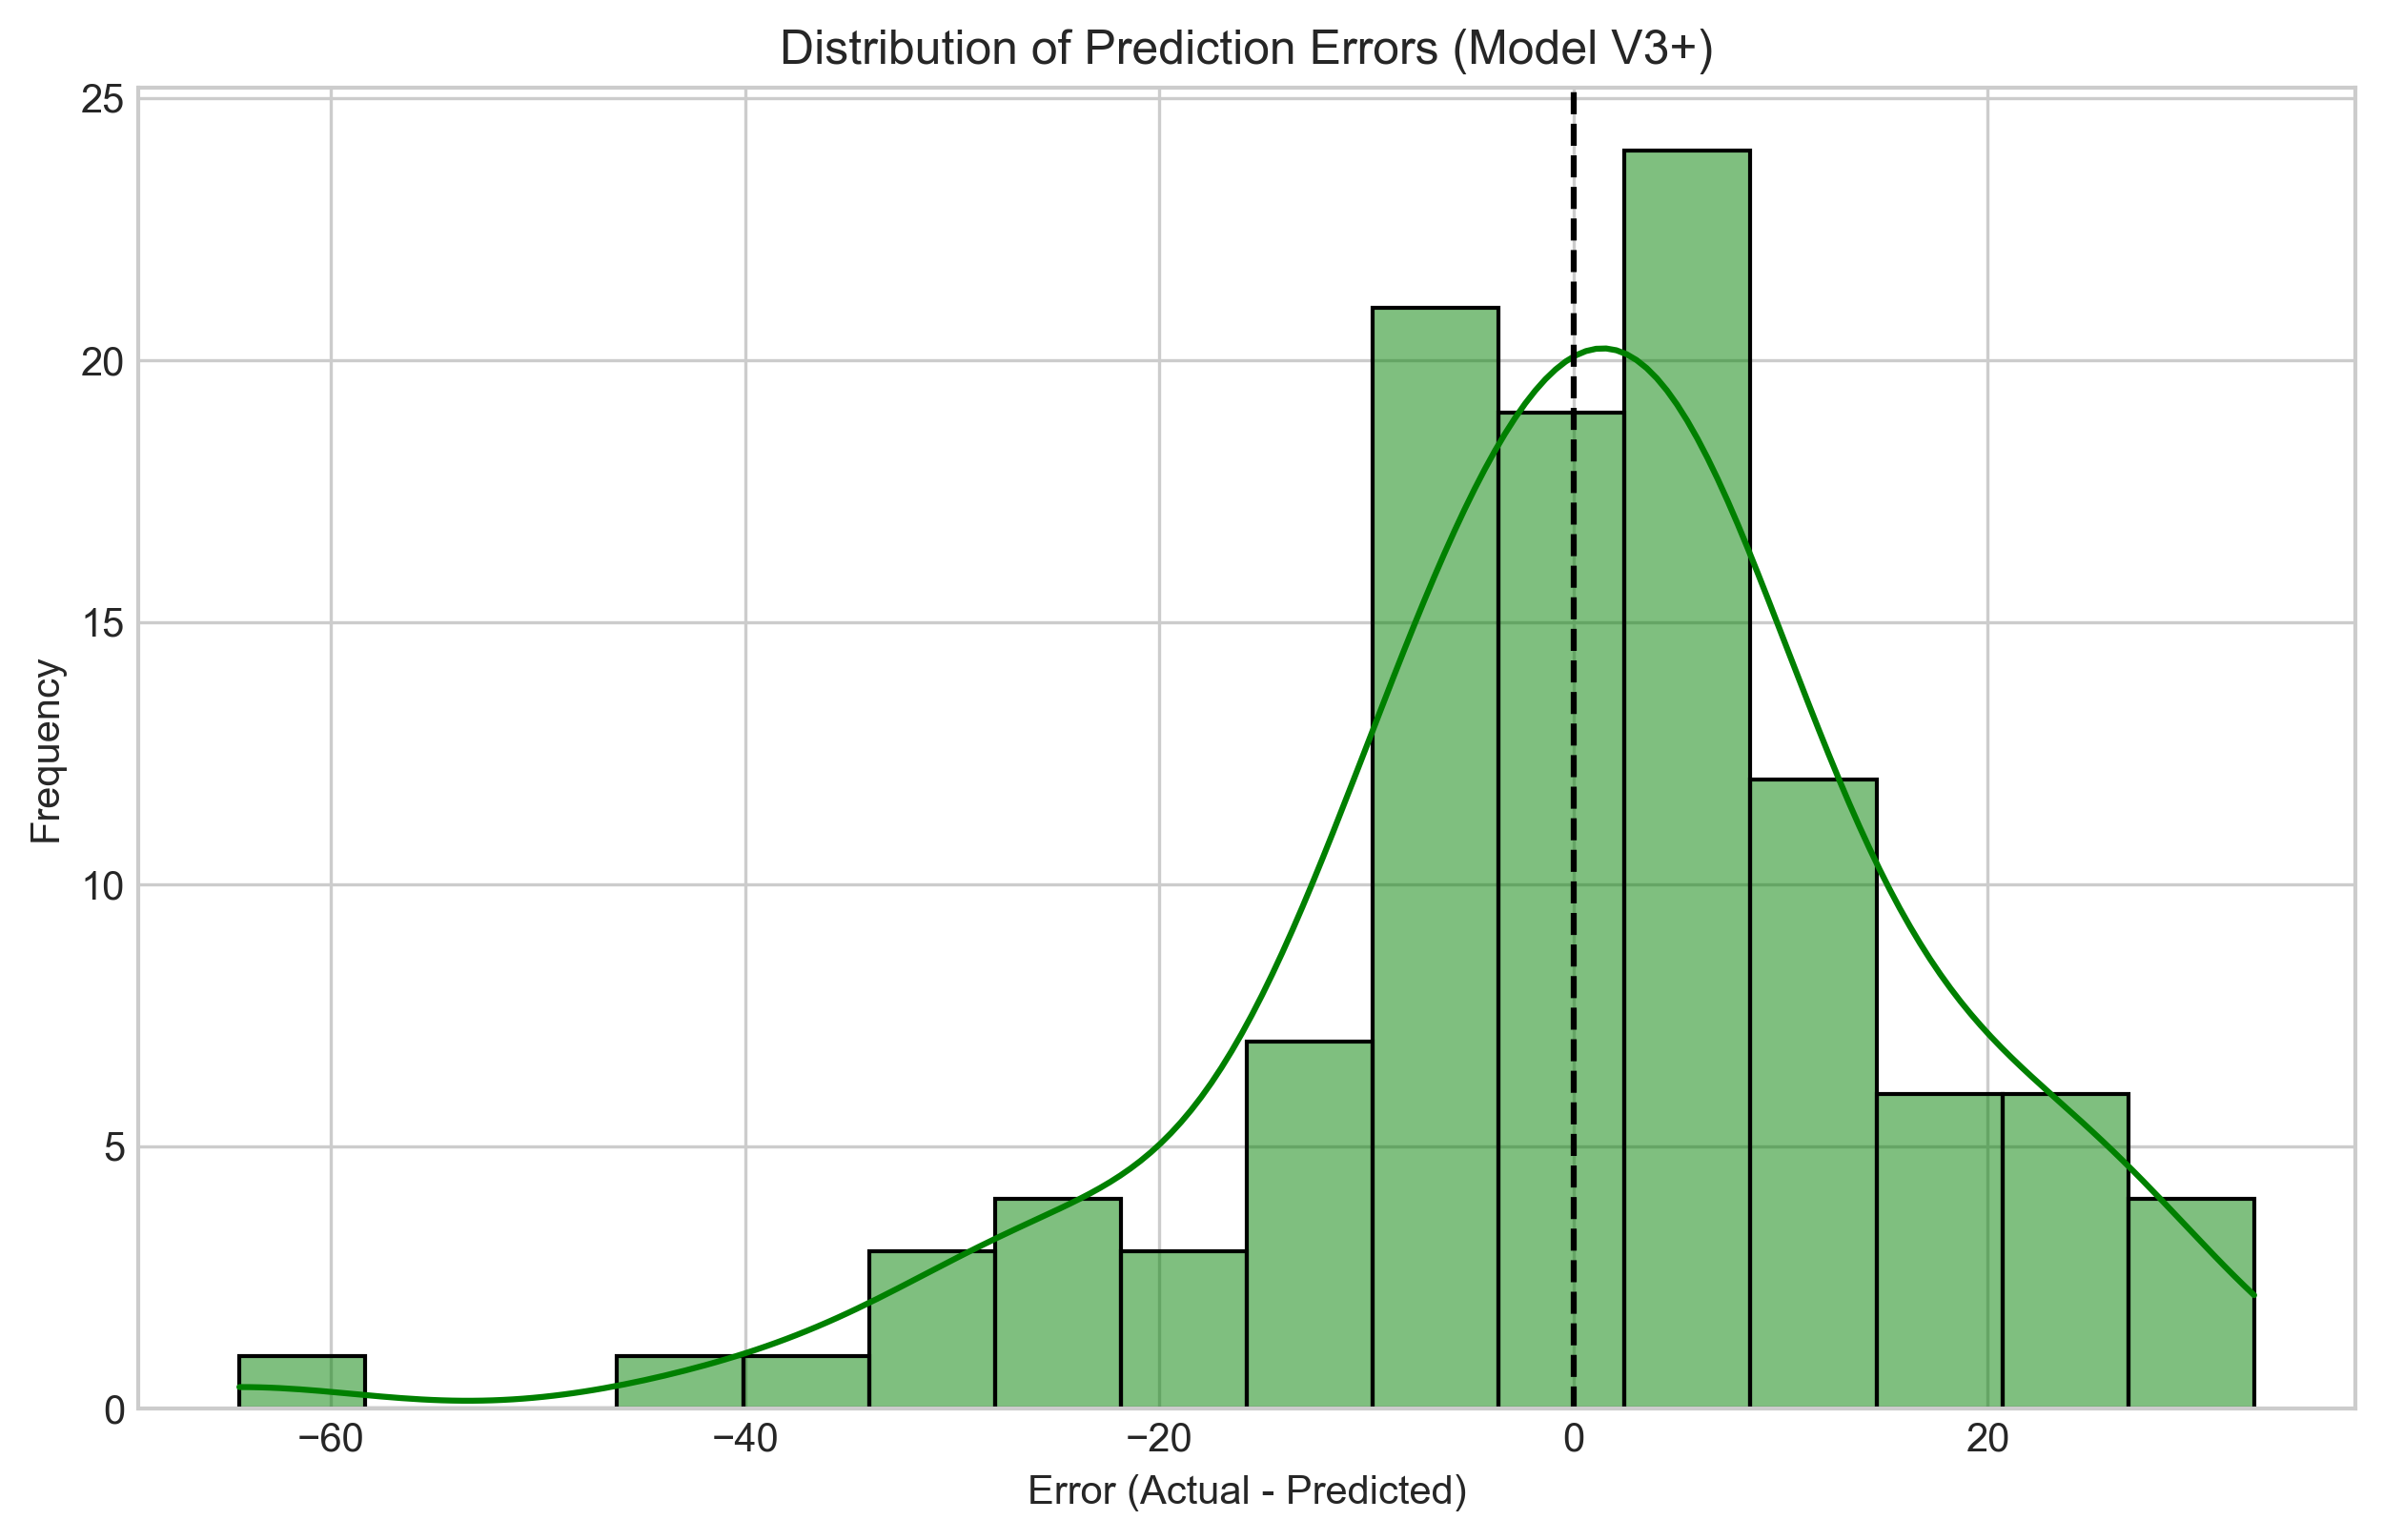

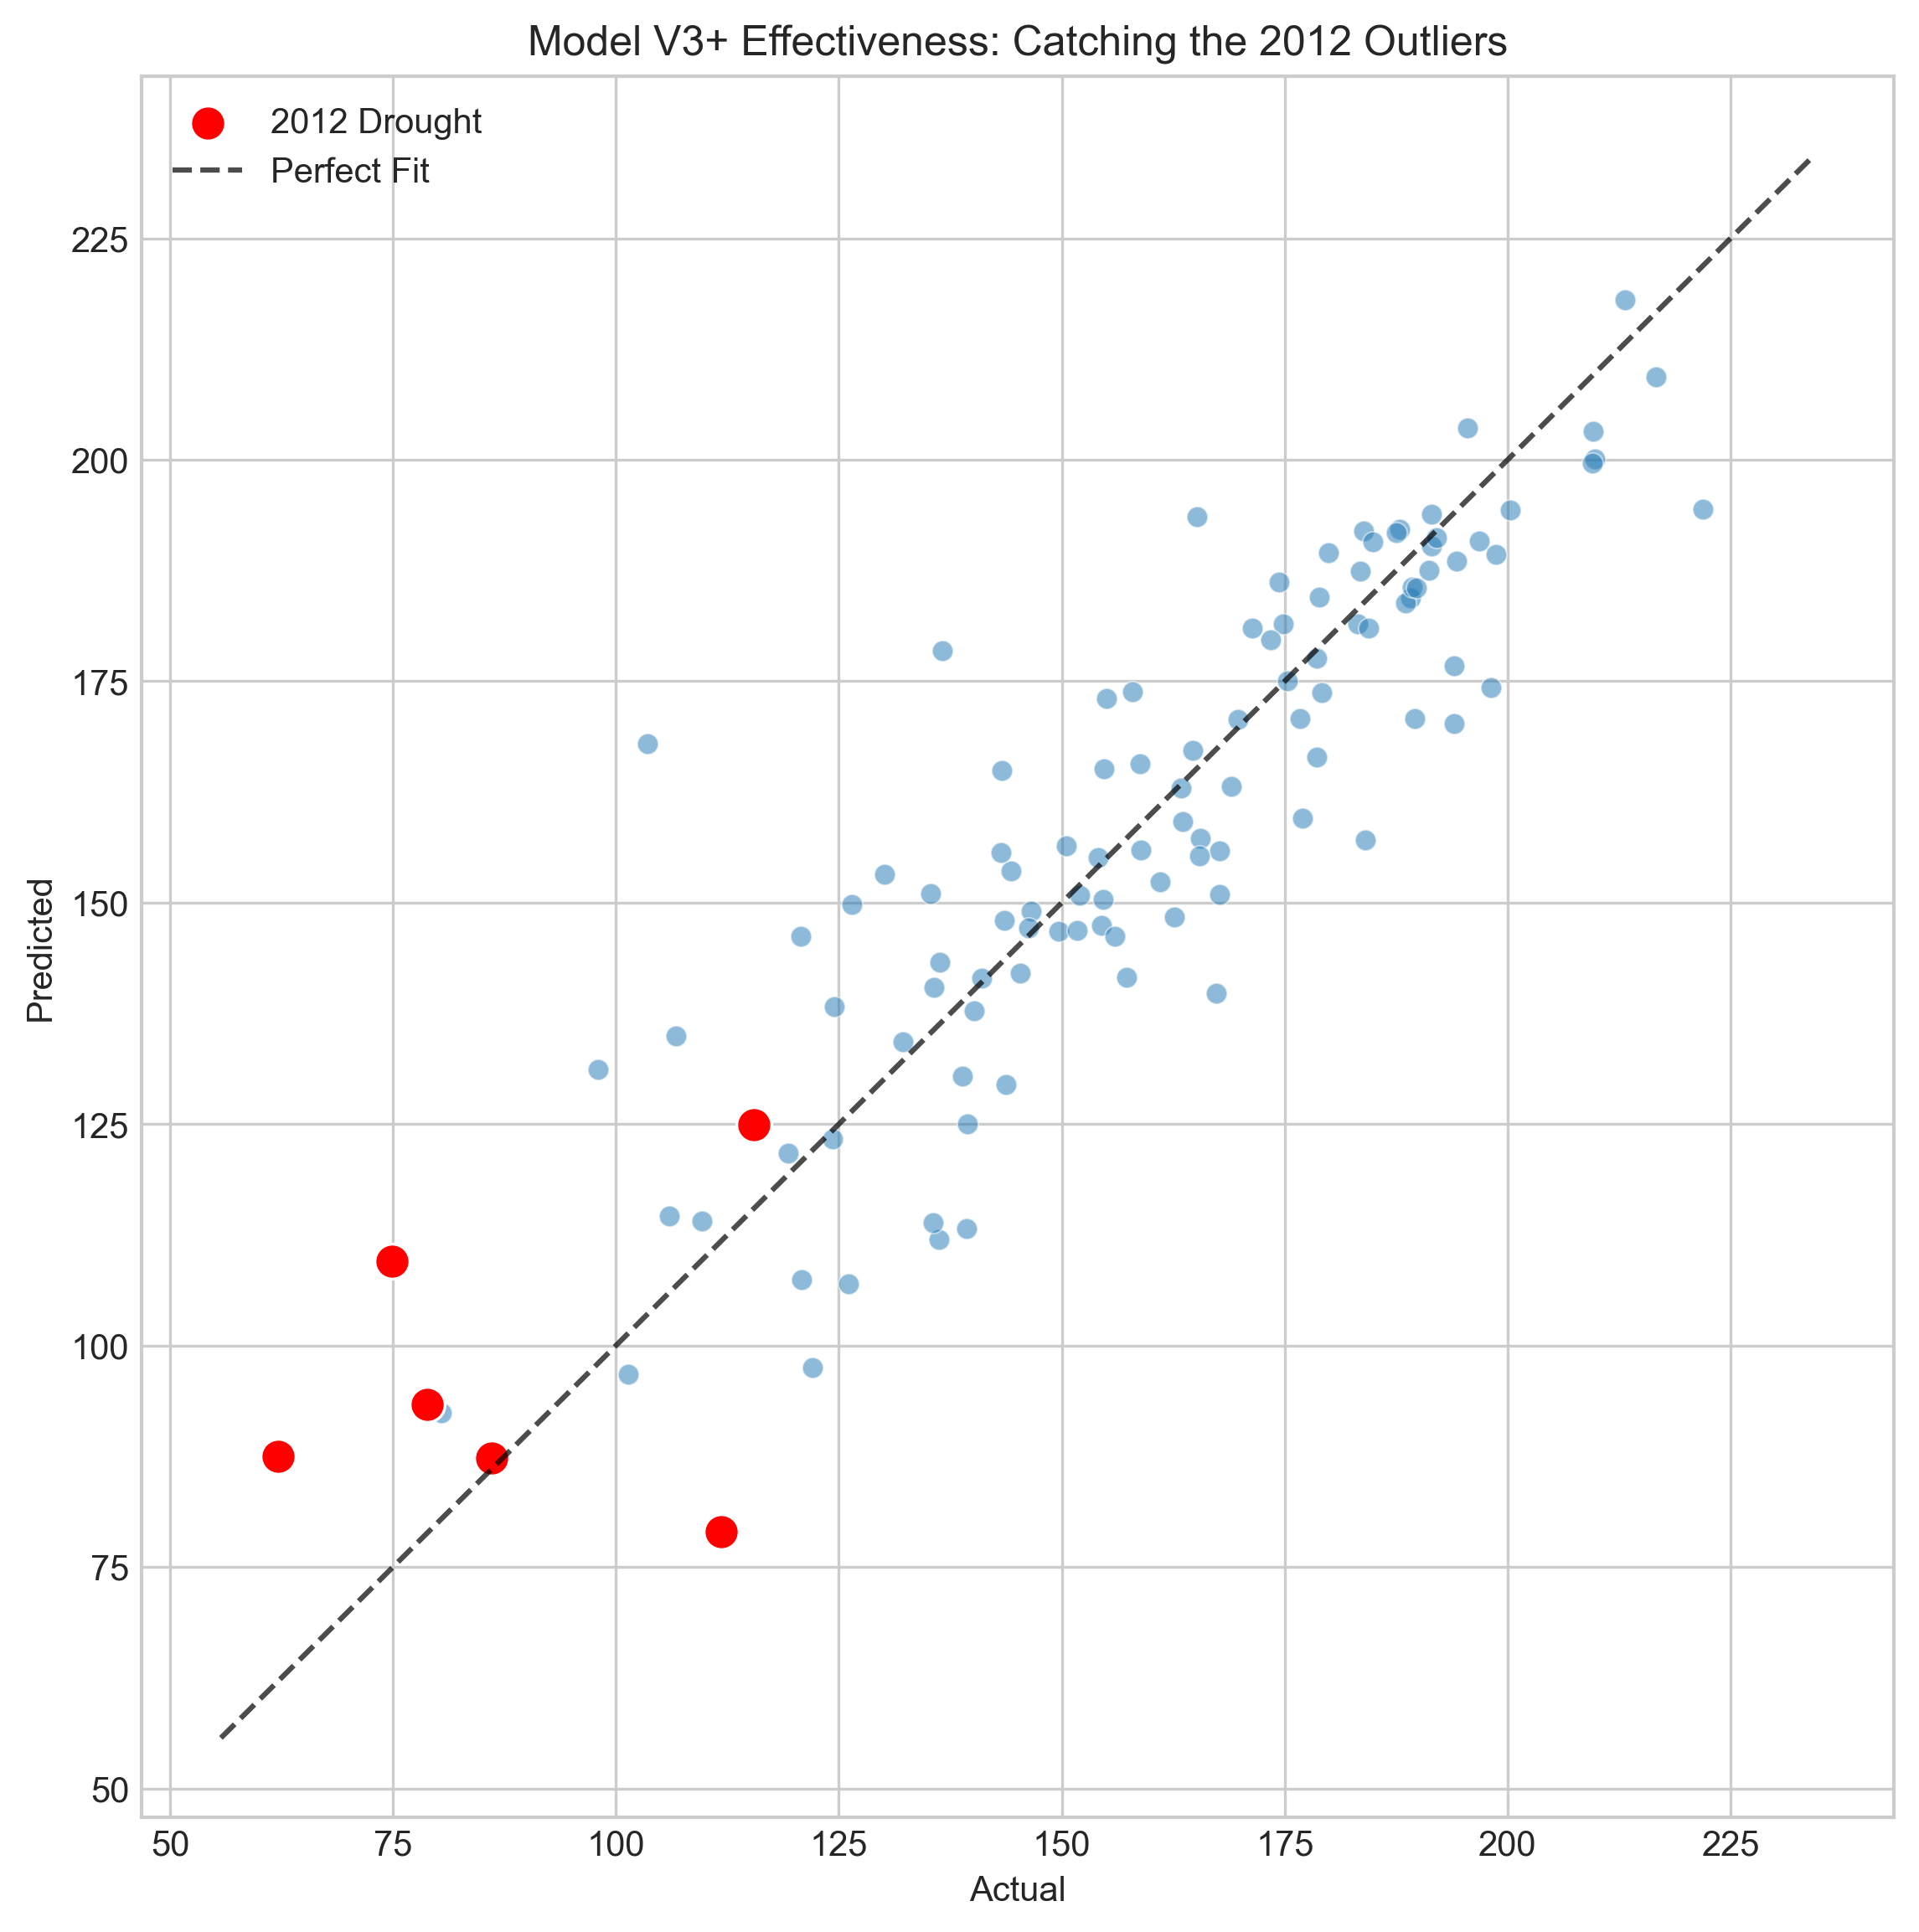

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred_v3 = model_v3_plus.predict(X_test)
errors_v3 = y_test - y_pred_v3

# Plotting the residuals
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(errors_v3, kde=True, color='green', label='Model V3+ (Biological + CDD)')
# Optional: if you still have y_pred_v2 errors, plot them in red to show the shift toward zero
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Prediction Errors (Model V3+)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Create a plotting dataframe
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_v3,
    'Year': merged_df.loc[y_test.index, 'year']
})

plt.figure(figsize=(9, 9), dpi=150)
# Plot regular points
sns.scatterplot(data=results_df[results_df['Year'] != 2012], x='Actual', y='Predicted', alpha=0.5)
# Highlight 2012 points in Red
sns.scatterplot(data=results_df[results_df['Year'] == 2012], x='Actual', y='Predicted', color='red', s=100, label='2012 Drought')

plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', alpha=0.7, label='Perfect Fit')
plt.title("Model V3+ Effectiveness: Catching the 2012 Outliers")
plt.legend()
plt.show()

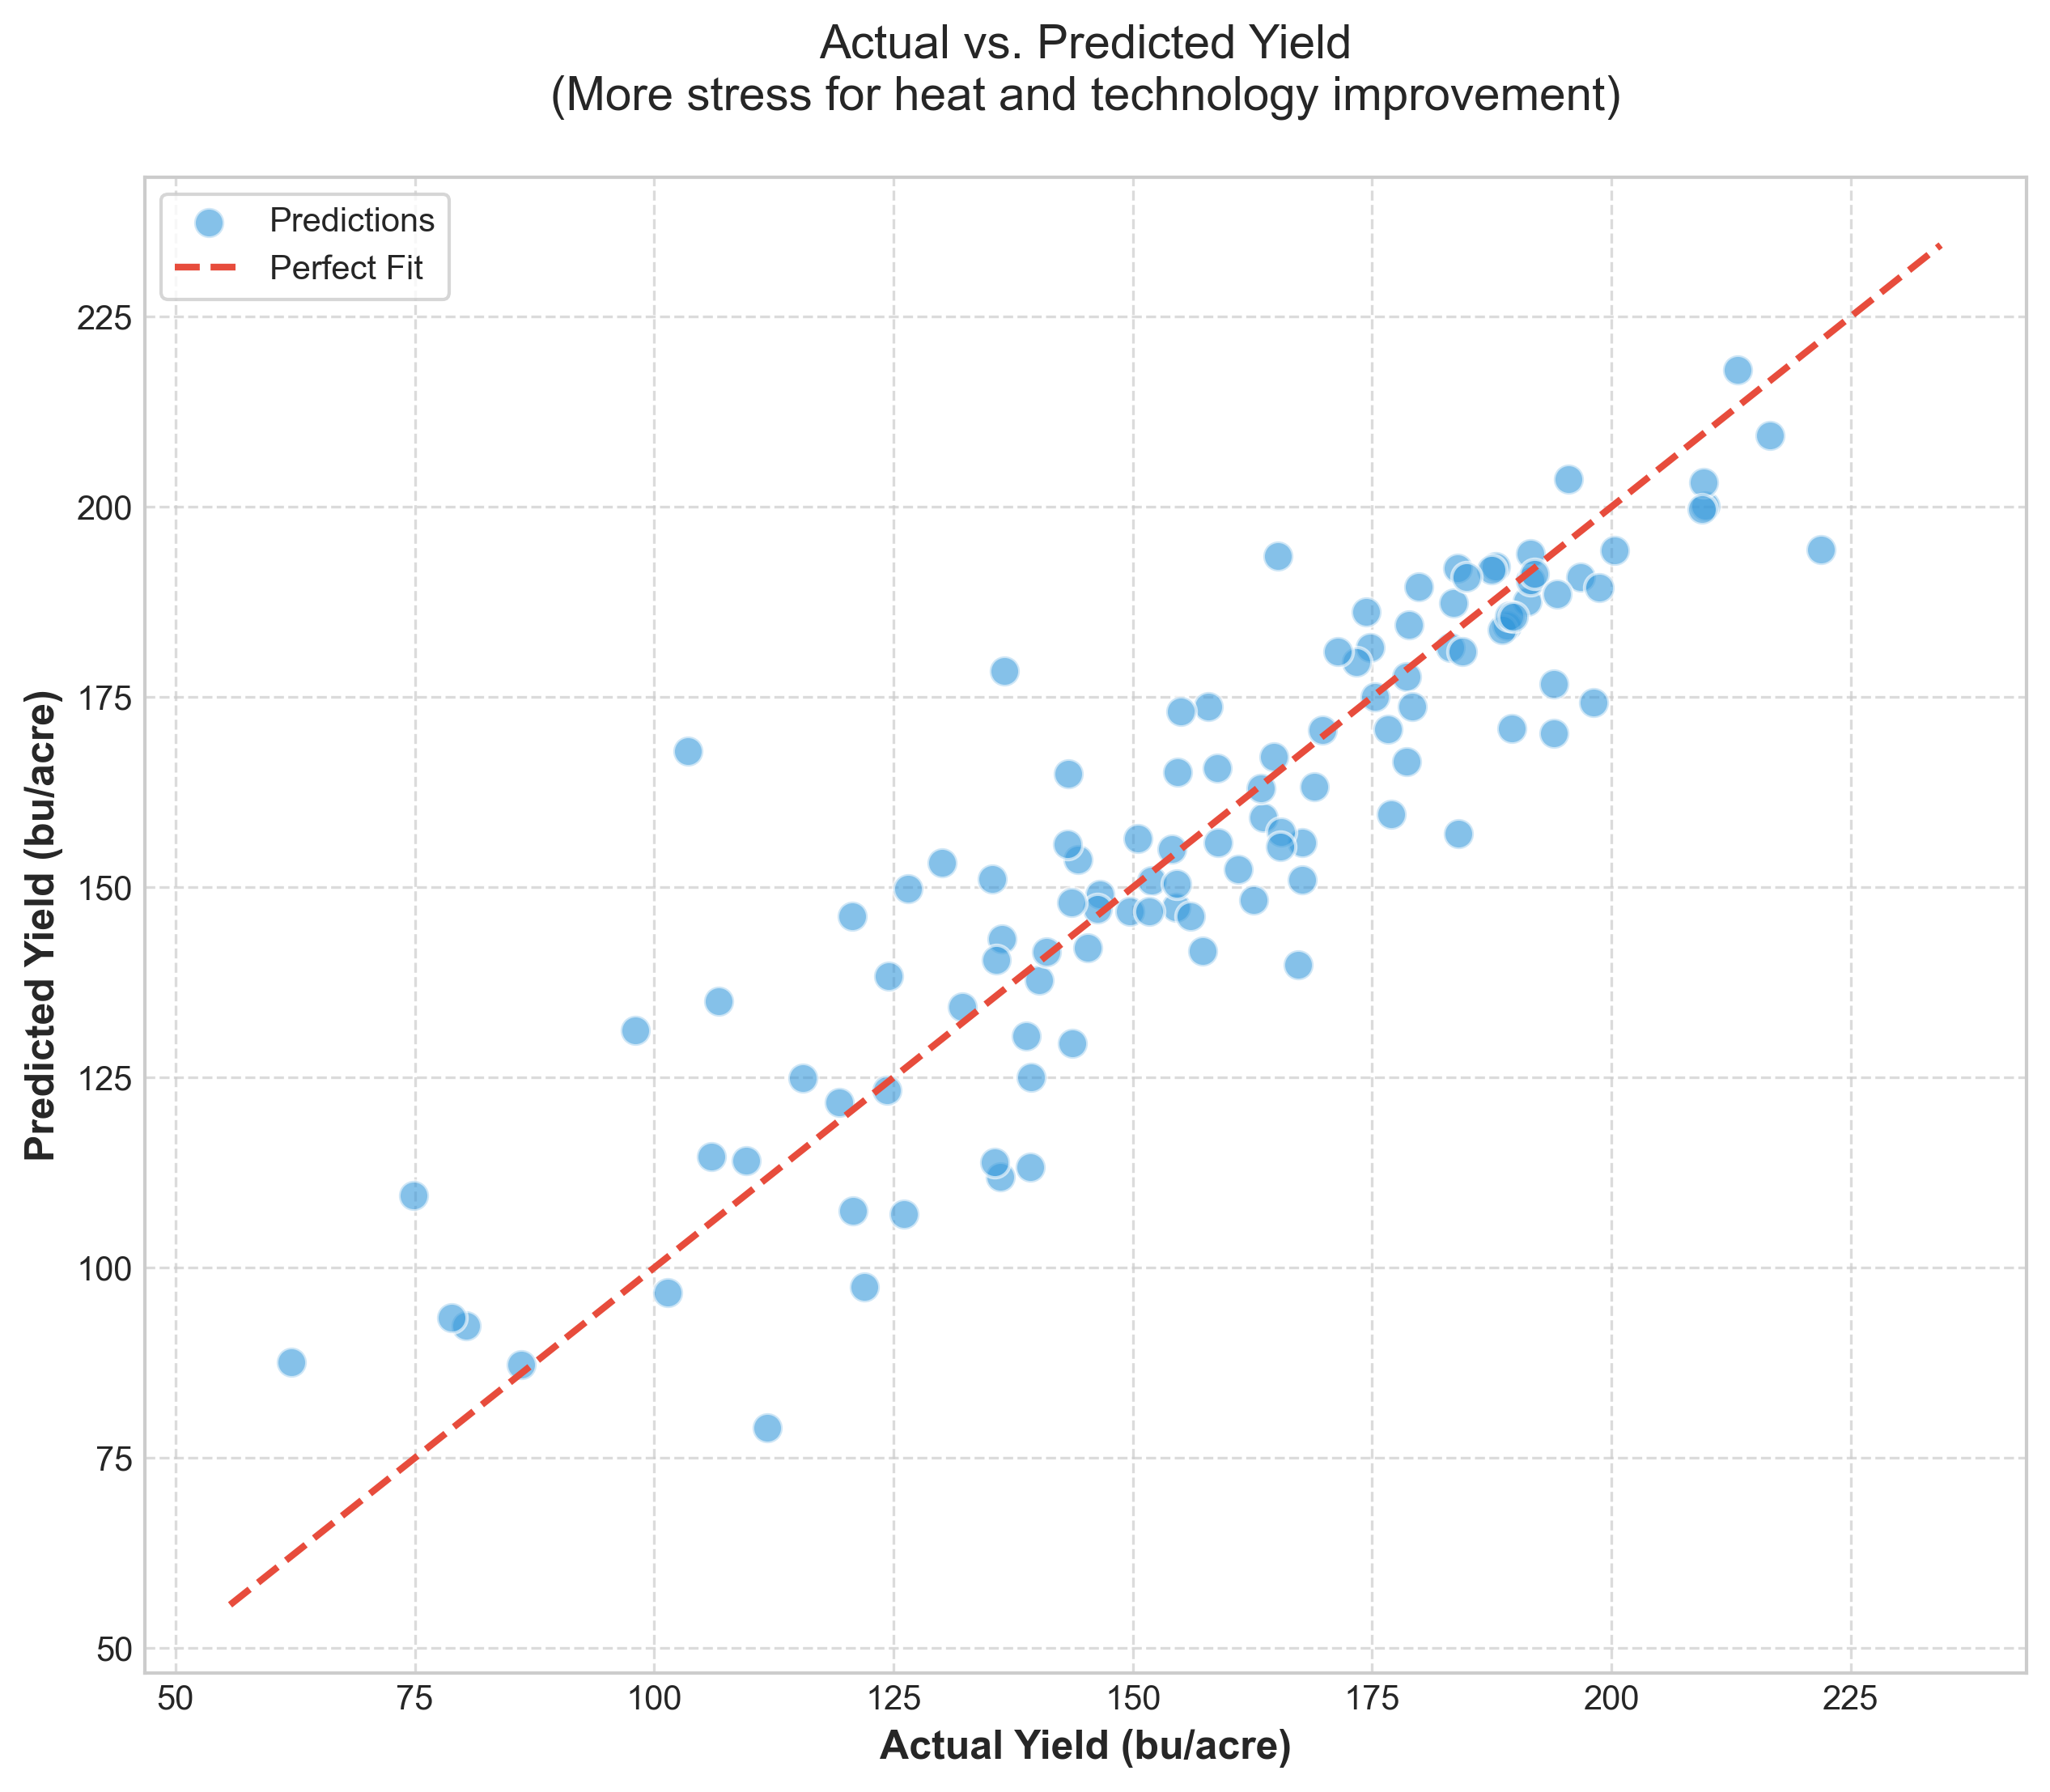

In [44]:
# 1. Set global resolution and style
# 'retina' or high DPI makes the plot crisp in Jupyter
%config InlineBackend.figure_format = 'retina' 
plt.style.use('seaborn-v0_8-whitegrid') # Cleaner aesthetic

# 2. Increase figure size and set DPI for the notebook display
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)

# 3. Plotting with better markers
ax.scatter(y_test, y_pred_v3, alpha=0.6, edgecolors='w', s=80, label='Predictions', color='#3498db')
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--', linewidth=2, label='Perfect Fit', color='#e74c3c')

# 4. Refined Labels and Title
ax.set_xlabel("Actual Yield (bu/acre)", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted Yield (bu/acre)", fontsize=12, fontweight='bold')
ax.set_title("Actual vs. Predicted Yield\n(More stress for heat and technology improvement)", 
             fontsize=14, pad=20)

# 5. Legend and Grid adjustments
ax.legend(frameon=True, fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# 6. Save with high resolution (300-600 DPI is standard for publication)
# Do this BEFORE plt.show()
plt.savefig('high_resolution_plot.png', dpi=600, bbox_inches='tight')

plt.show()

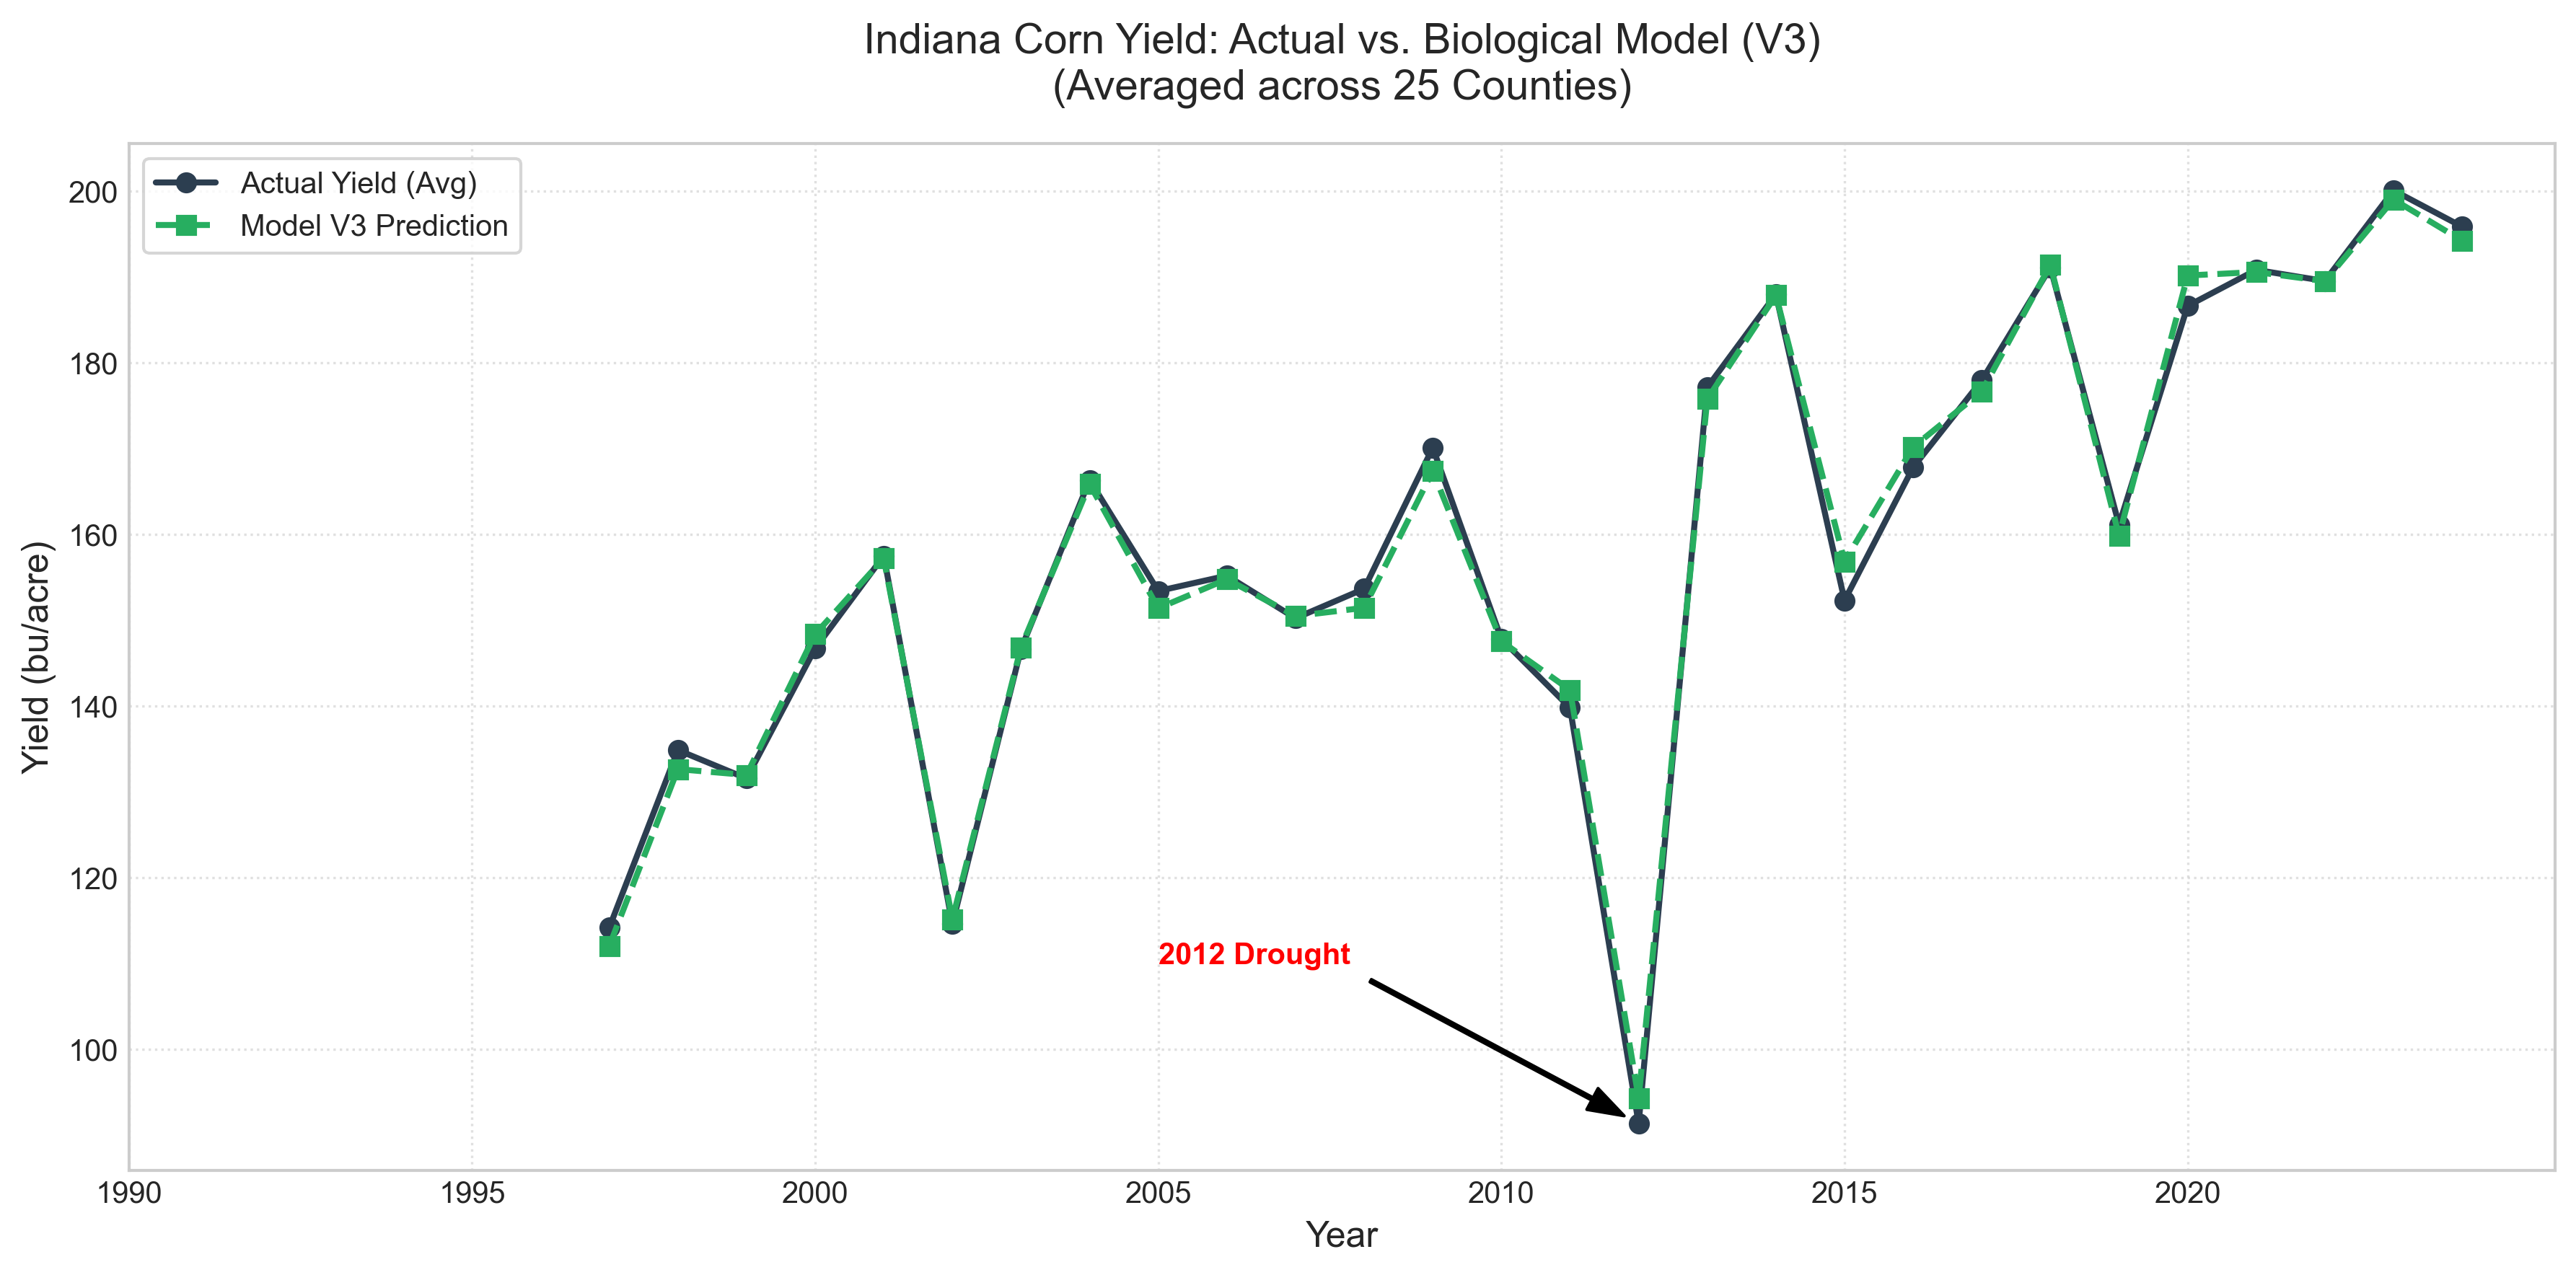

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Generate predictions for the ENTIRE dataset using Model V3
# (Using the features we stacked for X_biological)
merged_df['predicted_yield'] = model_v3_plus.predict(X_v3_plus)

# 2. Aggregate data by year to get the "State Average" for our 25 counties
yearly_comparison = merged_df.groupby('year').agg({
    'value': 'mean',           # Actual Yield
    'predicted_yield': 'mean'  # Model Prediction
}).reset_index()

# 3. Create the High-Resolution Plot
plt.figure(figsize=(12, 6), dpi=150)

# Plot Actual Yield
plt.plot(yearly_comparison['year'], yearly_comparison['value'], 
         marker='o', label='Actual Yield (Avg)', color='#2c3e50', linewidth=2, markersize=6)

# Plot Predicted Yield
plt.plot(yearly_comparison['year'], yearly_comparison['predicted_yield'], 
         marker='s', label='Model V3 Prediction', color='#27ae60', linestyle='--', linewidth=2, markersize=6)

# 4. Highlight the 2012 Drought
plt.annotate('2012 Drought', 
             xy=(2012, yearly_comparison.loc[yearly_comparison['year'] == 2012, 'value'].values[0]),
             xytext=(2005, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, fontweight='bold', color='red')

# 5. Formatting
plt.title("Indiana Corn Yield: Actual vs. Biological Model (V3)\n(Averaged across 25 Counties)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yield (bu/acre)", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(frameon=True, loc='upper left')

# Set clean x-axis ticks
plt.xticks(range(1990, 2025, 5))

plt.tight_layout()
plt.savefig('annual_prediction_accuracy.png', dpi=300)
plt.show()

In [79]:
#Test to see if model is overtrained/memorizing

train_score = model_v3_plus.score(X_train, y_train)
test_score = model_v3_plus.score(X_test, y_test)

print(f"Training R-squared: {train_score:.4f}")
print(f"Testing R-squared: {test_score:.4f}")
print(f"The 'Gap': {train_score - test_score:.4f}")

Training R-squared: 0.8210
Testing R-squared: 0.7391
The 'Gap': 0.0819
